In [490]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

In [491]:
df = pd.read_csv('Train.csv')

In [492]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [493]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [494]:
df.shape

(8523, 12)

In [495]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [496]:
df.duplicated().sum()

0

In [497]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [498]:
categorical_features = ['Item_Identifier','Item_Fat_Content','Item_Type','Outlet_Identifier'
                        ,'Outlet_Size','Outlet_Location_Type','Outlet_Type']

In [499]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Handling missing values


In [500]:
df['Item_Weight'] = df['Item_Weight'].fillna(df['Item_Weight'].mean())

In [501]:
# df['Outlet_Size'] = df['Outlet_Size'].fillna(df['Outlet_Size'].mode())

In [502]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [503]:
df['Outlet_Size'].mode()

0    Medium
Name: Outlet_Size, dtype: object

In [504]:
df[df['Outlet_Size']== 'Medium'].value_counts

<bound method DataFrame.value_counts of      Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDA15     9.300000          Low Fat         0.016047   
1              DRC01     5.920000          Regular         0.019278   
2              FDN15    17.500000          Low Fat         0.016760   
5              FDP36    10.395000          Regular         0.000000   
7              FDP10    12.857645          Low Fat         0.127470   
...              ...          ...              ...              ...   
8506           DRF37    17.250000          Low Fat         0.084676   
8511           FDF05    17.500000          Low Fat         0.026980   
8515           FDH24    20.700000          Low Fat         0.021518   
8516           NCJ19    18.600000          Low Fat         0.118661   
8521           FDN46     7.210000          Regular         0.145221   

         Item_Type  Item_MRP Outlet_Identifier  Outlet_Establishment_Year  \
0            Dairy  249.8092  

In [505]:
# We can do through this but it's not right way to do this

# mode_of_outlet_size = df['Outlet_Size'].mode()[0]
# df['Outlet_Size'] = df['Outlet_Size'].fillna(mode_of_outlet_size)

In [506]:
mode_of_outlet_size = df.pivot_table(values='Outlet_Size',columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))

In [507]:
# if we have Outlet_Type = 'Grocery Store' and Outlet_Size is NaN then it will get replace by value Small
mode_of_outlet_size 

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [508]:
missing_values = df['Outlet_Size'].isnull()
missing_values

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool

In [509]:
df.loc[missing_values, 'Outlet_Size'] = df.loc[missing_values,'Outlet_Type'].apply(lambda x: mode_of_outlet_size)

In [510]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [511]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [512]:
# Numerical Features
numerical_features = ['Item_Weight','Item_Visibility','Item_MRP','Outlet_Establishment_Year','Item_Outlet_Sales']

In [513]:
sns.set()

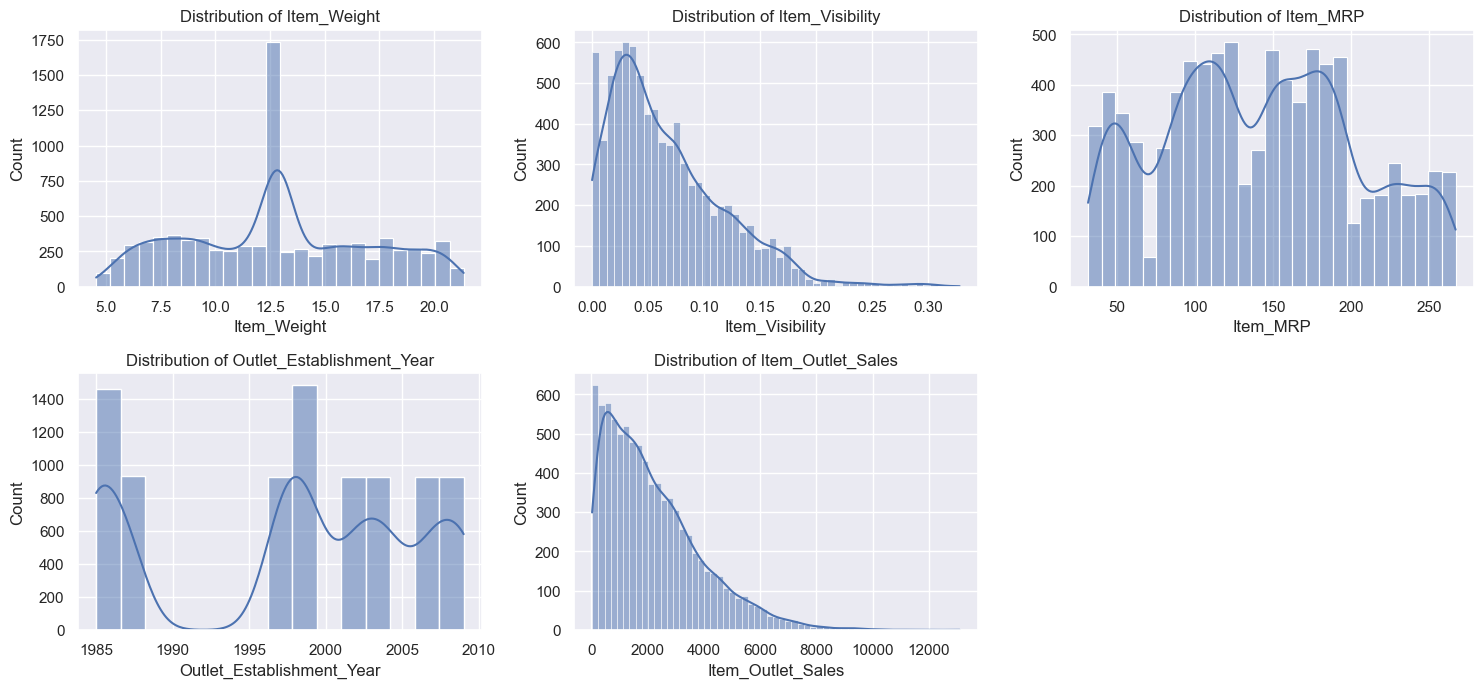

In [514]:
plt.figure(figsize=(15,10))

for i, column in enumerate(numerical_features,1):
    plt.subplot(3,3,i)
    sns.histplot(df[column],kde=True)
    plt.title(f"Distribution of {column}")

plt.tight_layout()
plt.show()

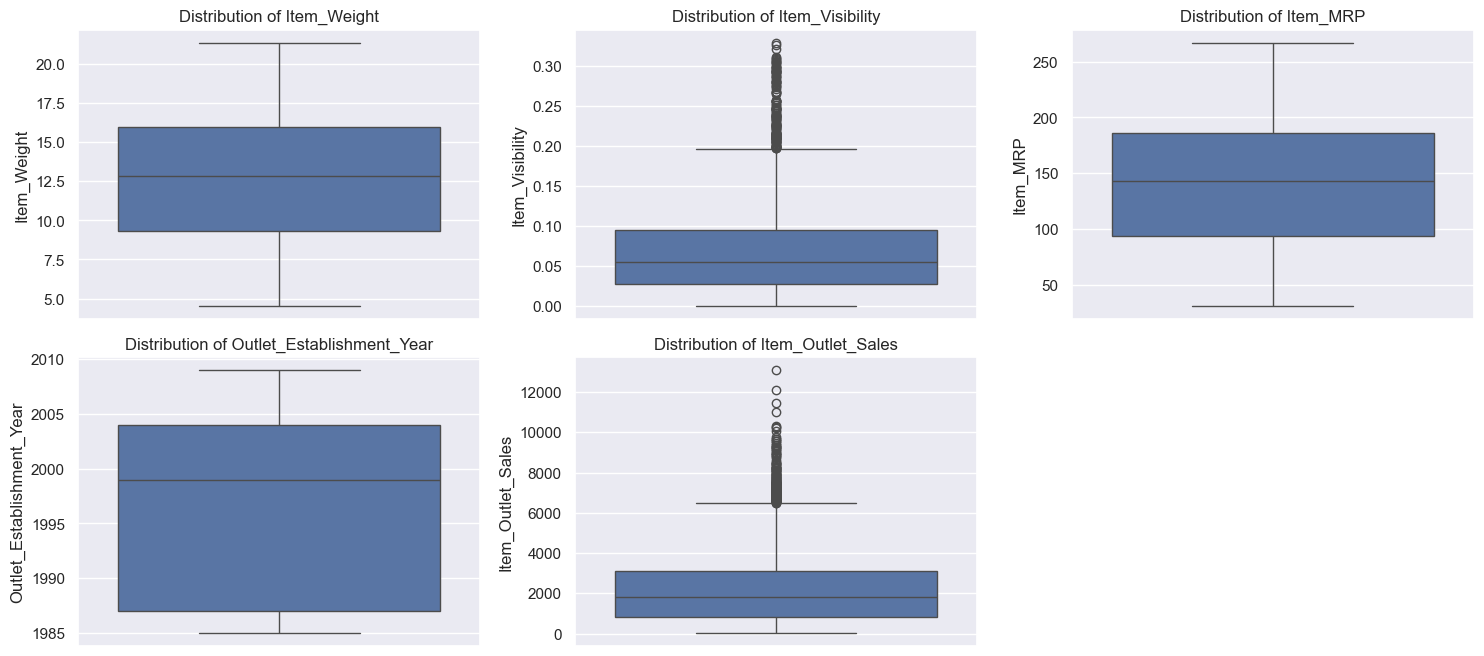

In [515]:
plt.figure(figsize=(15,10))

for i, column in enumerate(numerical_features,1):
    plt.subplot(3,3,i)
    sns.boxplot(df[column])
    plt.title(f"Distribution of {column}")

plt.tight_layout()
plt.show()

<Axes: xlabel='Outlet_Establishment_Year', ylabel='count'>

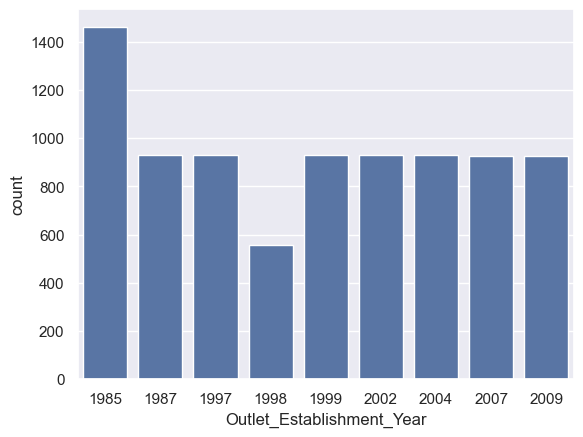

In [516]:
sns.countplot(x = 'Outlet_Establishment_Year',data=df)

In [517]:
# Categorical Features
categorical_features

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

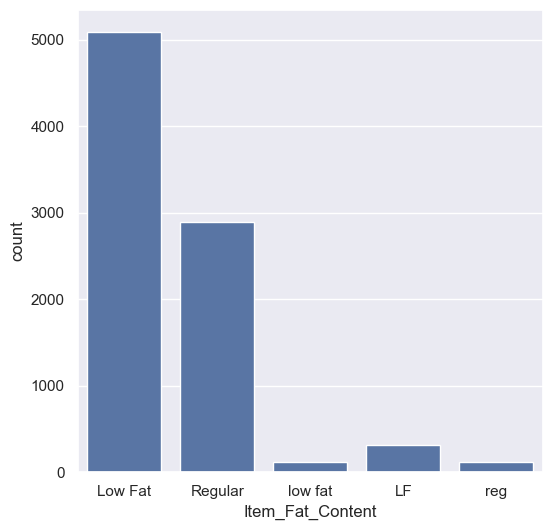

In [518]:
plt.figure(figsize=(6,6))
sns.countplot(x = 'Item_Fat_Content',data=df)
plt.show()

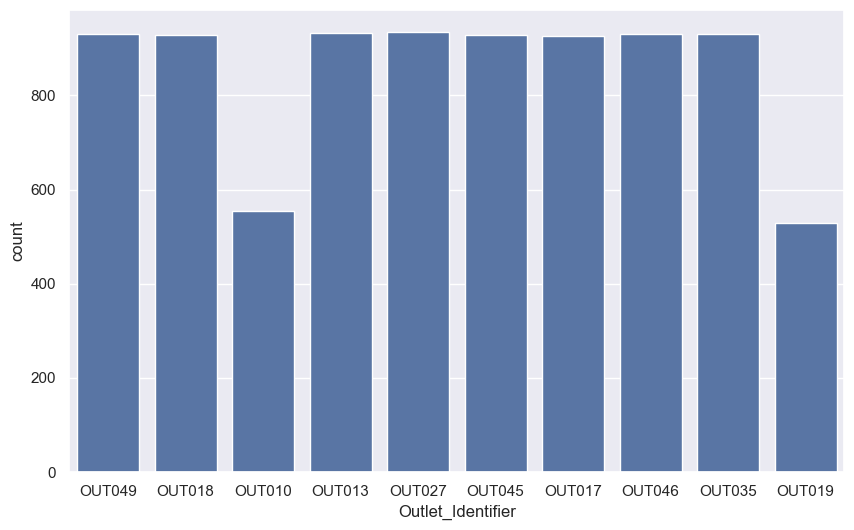

In [519]:
plt.figure(figsize=(10,6))
sns.countplot(x = 'Outlet_Identifier',data=df)
plt.show()

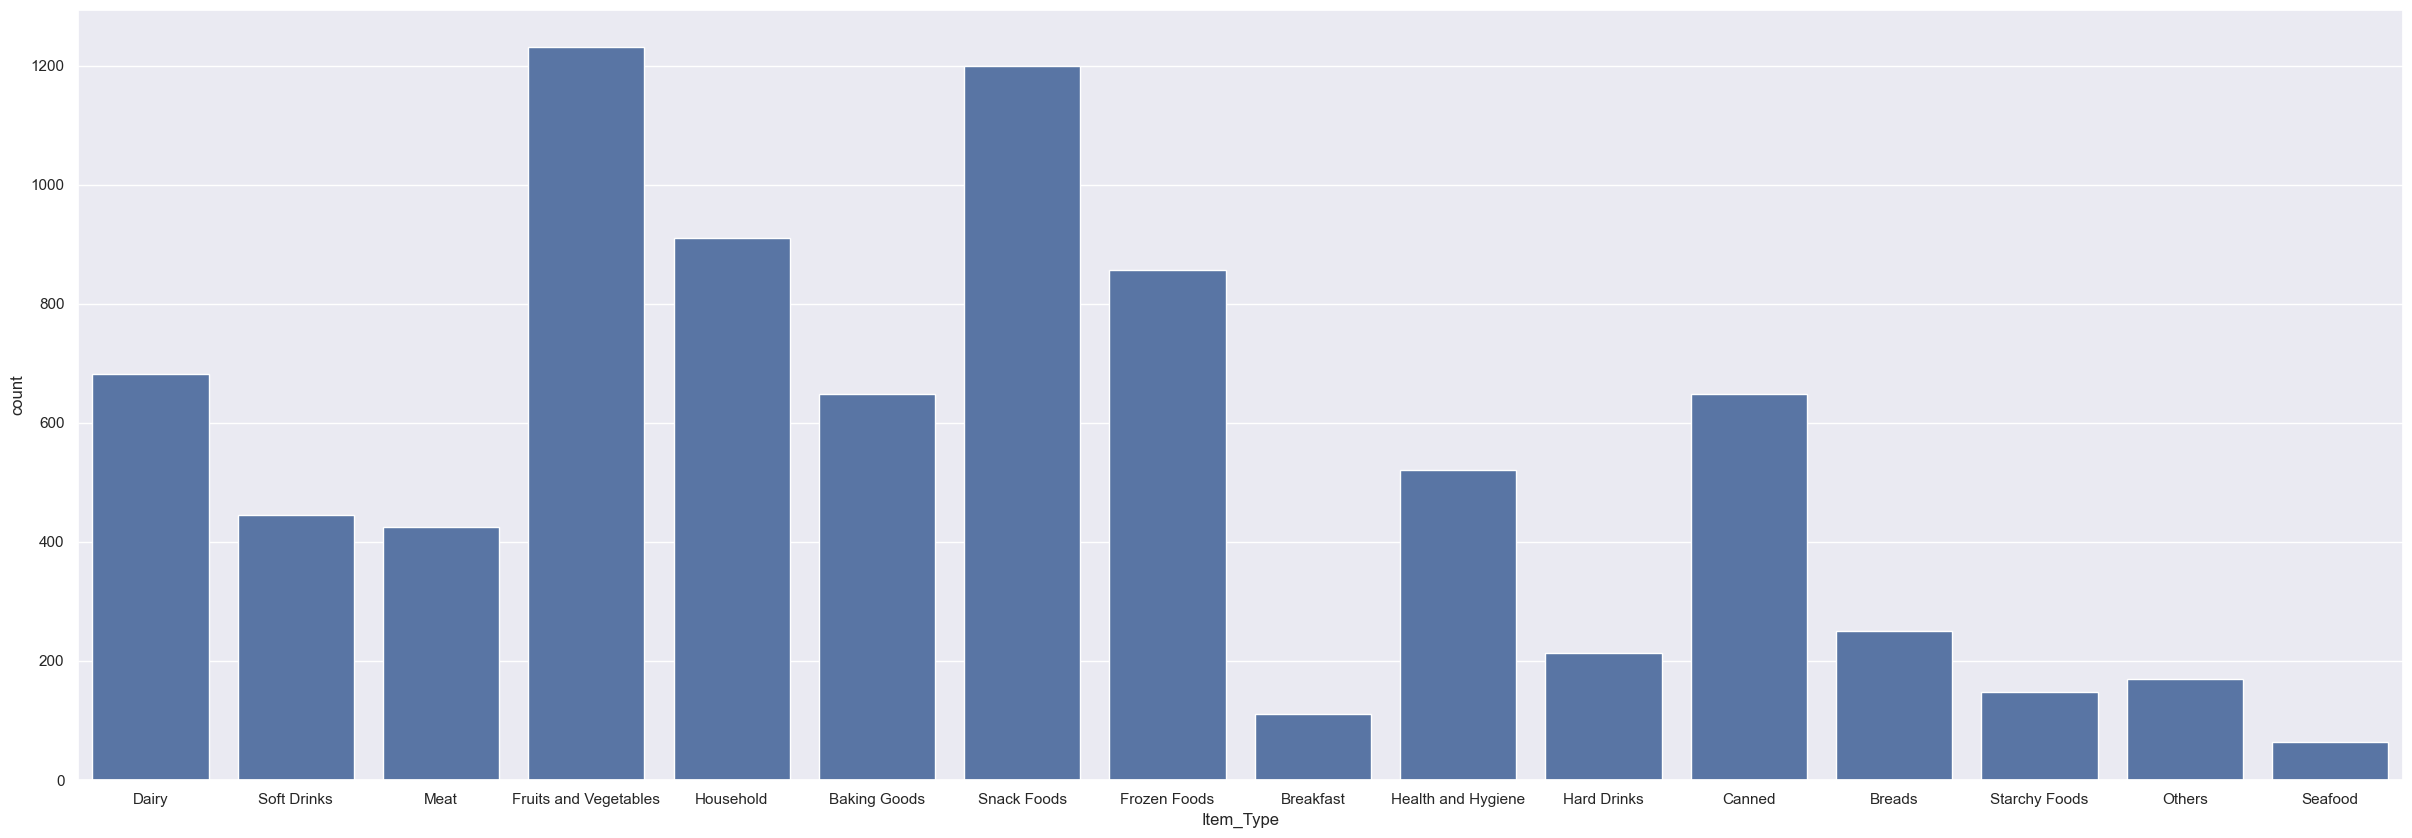

In [520]:
plt.figure(figsize=(30,10))
sns.countplot(x = 'Item_Type',data=df,)
plt.show()

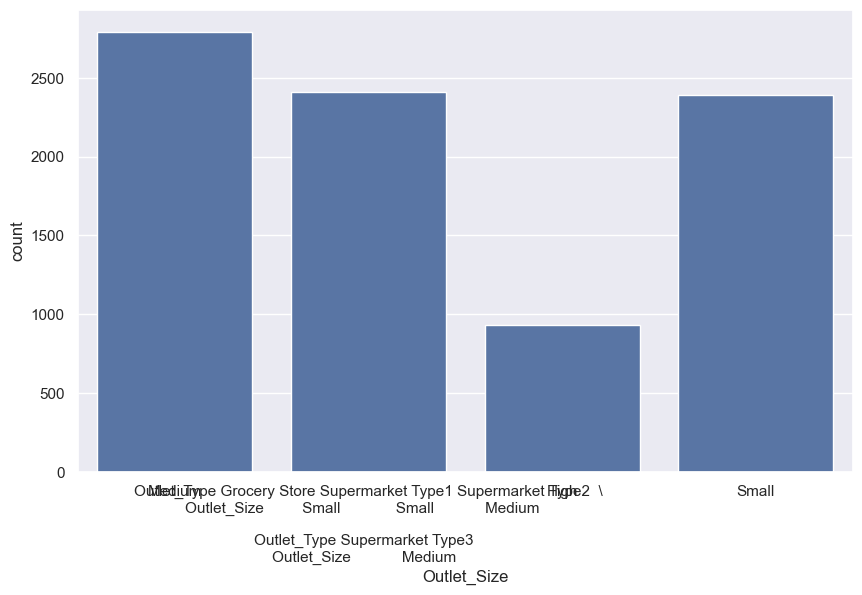

In [521]:
df['Outlet_Size'] = df['Outlet_Size'].astype(str)

plt.figure(figsize=(10,6))
sns.countplot(x = 'Outlet_Size',data=df)
plt.show()

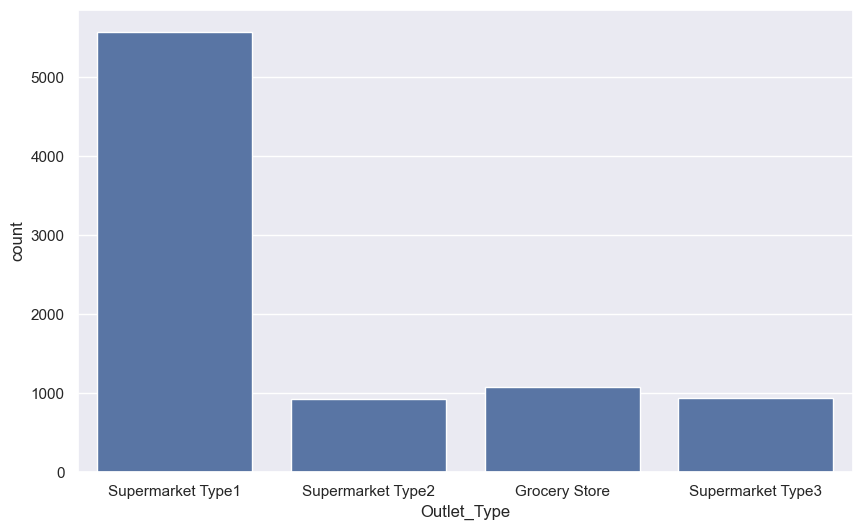

In [522]:
plt.figure(figsize=(10,6))
sns.countplot(x = 'Outlet_Type',data=df)
plt.show()

**Data Preprocessing**

In [523]:
df['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [524]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF': 'Low Fat', 'low fat': 'Low Fat', 'reg':'Regular'})

In [525]:
df['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

**LABEL ENCODING**

In [526]:
encoder = LabelEncoder()

In [527]:
categorical_features

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [528]:
for column in categorical_features:
    df[column]  = encoder.fit_transform(df[column])

In [529]:
df['Outlet_Size'] = df['Outlet_Size'].astype(int)

In [530]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


**Splitting Data into training and testting**

In [531]:
X = df.drop('Item_MRP',axis=1)
y = df['Item_MRP']

In [532]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [533]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   int32  
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   int32  
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   int32  
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   int32  
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   int32  
 9   Outlet_Location_Type       8523 non-null   int32  
 10  Outlet_Type                8523 non-null   int32  
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int32(7), int64(1)
memory usage: 566.1 KB


**Training Model**

In [537]:
xgboost = XGBRegressor(reg_alpha=1, reg_lambda=1)  # Add L1/L2 regularization

xgboost.fit(X_train,y_train)

AttributeError: 'super' object has no attribute '__sklearn_tags__'

AttributeError: 'super' object has no attribute '__sklearn_tags__'

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

**Evaluation**

In [538]:
train_pred = xgboost.predict(X_train)
test_pred = xgboost.predict(X_test)

In [539]:
print(r2_score(y_train,train_pred))
print(r2_score(y_test,test_pred))

0.8982051667606896
0.6255817543812572
